In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'/Users/mac/Desktop/MrFrank/botswana_bank_customer_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Address,Contact Information,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,High School,"26644 Diaz Viaduct\nNorth Jessicaville, VI 14852",001-301-934-3058x0825,30,Retail,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,High School,"5642 Rachel Pass Suite 320\nPort Peggy, RI 75805",+1-581-683-4267,27,SME,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,High School,00025 Brittany Flats Apt. 543\nNew Amandaborou...,9753900004,14,Retail,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,High School,Unit 3386 Box 0088\nDPO AE 71940,+1-928-477-2856x660,23,Corporate,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,"0120 Leslie River\nWest Lindseychester, MN 98290",204.515.2388,22,Corporate,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


In [3]:
df.shape

(115640, 25)

In [6]:
df = df.drop(columns = ['CustomerId', 'Surname', 'First Name', 'Date of Birth', 'Address', 
                         'Contact Information', 'Preferred Communication Channel','Churn Reason', 'Churn Date',
                        ])

In [7]:
df.head()

,RowNumber,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,1,Male,Divorced,3,Information systems manager,77710.14,High School,30,Retail,397,24,41959.74,0,211359.05,1,0
1,2,Female,Married,1,Charity fundraiser,58209.87,High School,27,SME,665,10,8916.67,0,30624.76,4,1
2,3,Female,Single,1,Television production assistant,9794.01,High School,14,Retail,715,21,43270.54,0,111956.61,2,6
3,4,Female,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,747,17,17887.65,0,201187.61,1,0
4,5,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,549,25,32686.84,0,60391.24,5,6


In [12]:
df = df.drop(columns = 'RowNumber')

In [9]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df['Marital Status'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [13]:
df['Number of Dependents'].unique()

array([3, 1, 5, 2, 0, 4])

In [16]:
df['Education Level'].unique()

array(['High School', "Master's", "Bachelor's", 'Diploma'], dtype=object)

In [18]:
df['Customer Segment'].unique()

array(['Retail', 'SME', 'Corporate'], dtype=object)

In [15]:
df = df.drop(columns = 'Occupation')

In [19]:
df.isnull().sum()

Gender                   0
Marital Status           0
Number of Dependents     0
Income                   0
Education Level          0
Customer Tenure          0
Customer Segment         0
Credit Score             0
Credit History Length    0
Outstanding Loans        0
Churn Flag               0
Balance                  0
NumOfProducts            0
NumComplaints            0
dtype: int64

In [21]:
df.dtypes

Gender                    object
Marital Status            object
Number of Dependents       int64
Income                   float64
Education Level           object
Customer Tenure            int64
Customer Segment          object
Credit Score               int64
Credit History Length      int64
Outstanding Loans        float64
Churn Flag                 int64
Balance                  float64
NumOfProducts              int64
NumComplaints              int64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


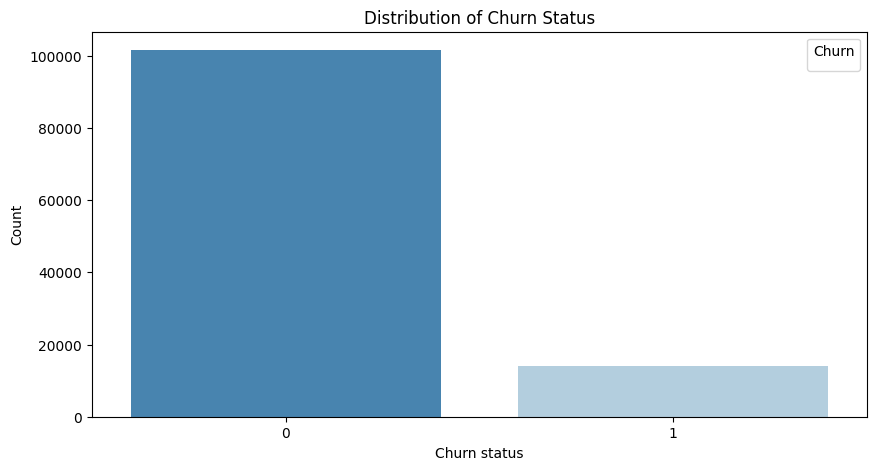

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn Flag', palette="Blues_r")
plt.title("Distribution of Churn Status")
plt.xlabel("Churn status")
plt.ylabel("Count")
plt.legend(title='Churn')
plt.show()

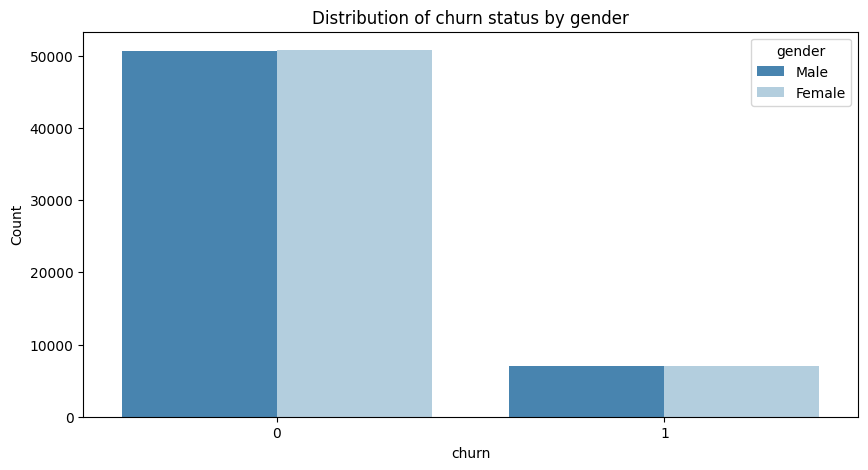

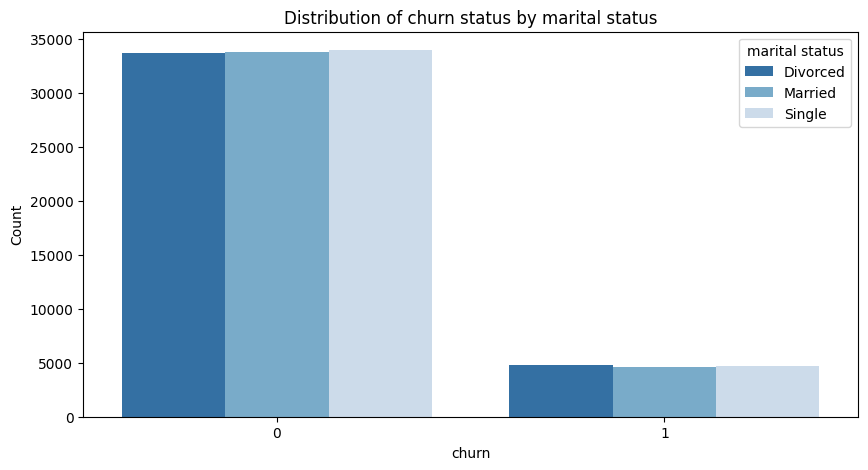

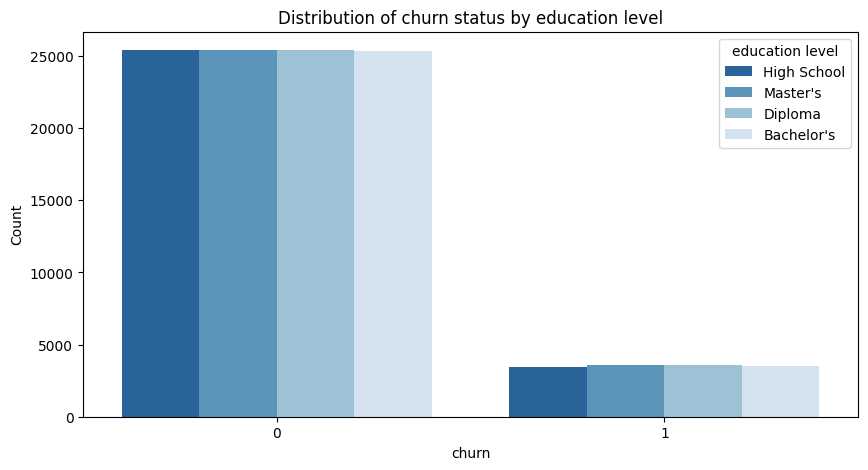

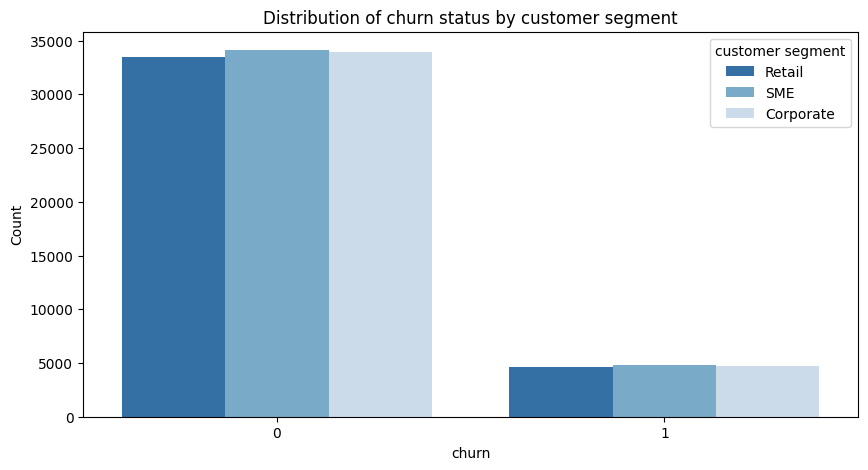

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn Flag', palette="Blues_r", hue='Gender')
plt.title("Distribution of churn status by gender")
plt.xlabel("churn")
plt.ylabel("Count")
plt.legend(title='gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn Flag', palette="Blues_r", hue='Marital Status')
plt.title("Distribution of churn status by marital status")
plt.xlabel("churn")
plt.ylabel("Count")
plt.legend(title='marital status')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn Flag', palette="Blues_r", hue='Education Level')
plt.title("Distribution of churn status by education level")
plt.xlabel("churn")
plt.ylabel("Count")
plt.legend(title='education level')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn Flag', palette="Blues_r", hue='Customer Segment')
plt.title("Distribution of churn status by customer segment")
plt.xlabel("churn")
plt.ylabel("Count")
plt.legend(title='customer segment')
plt.show()

In [24]:
df.columns

Index(['Gender', 'Marital Status', 'Number of Dependents', 'Income',
       'Education Level', 'Customer Tenure', 'Customer Segment',
       'Credit Score', 'Credit History Length', 'Outstanding Loans',
       'Churn Flag', 'Balance', 'NumOfProducts', 'NumComplaints'],
      dtype='object')

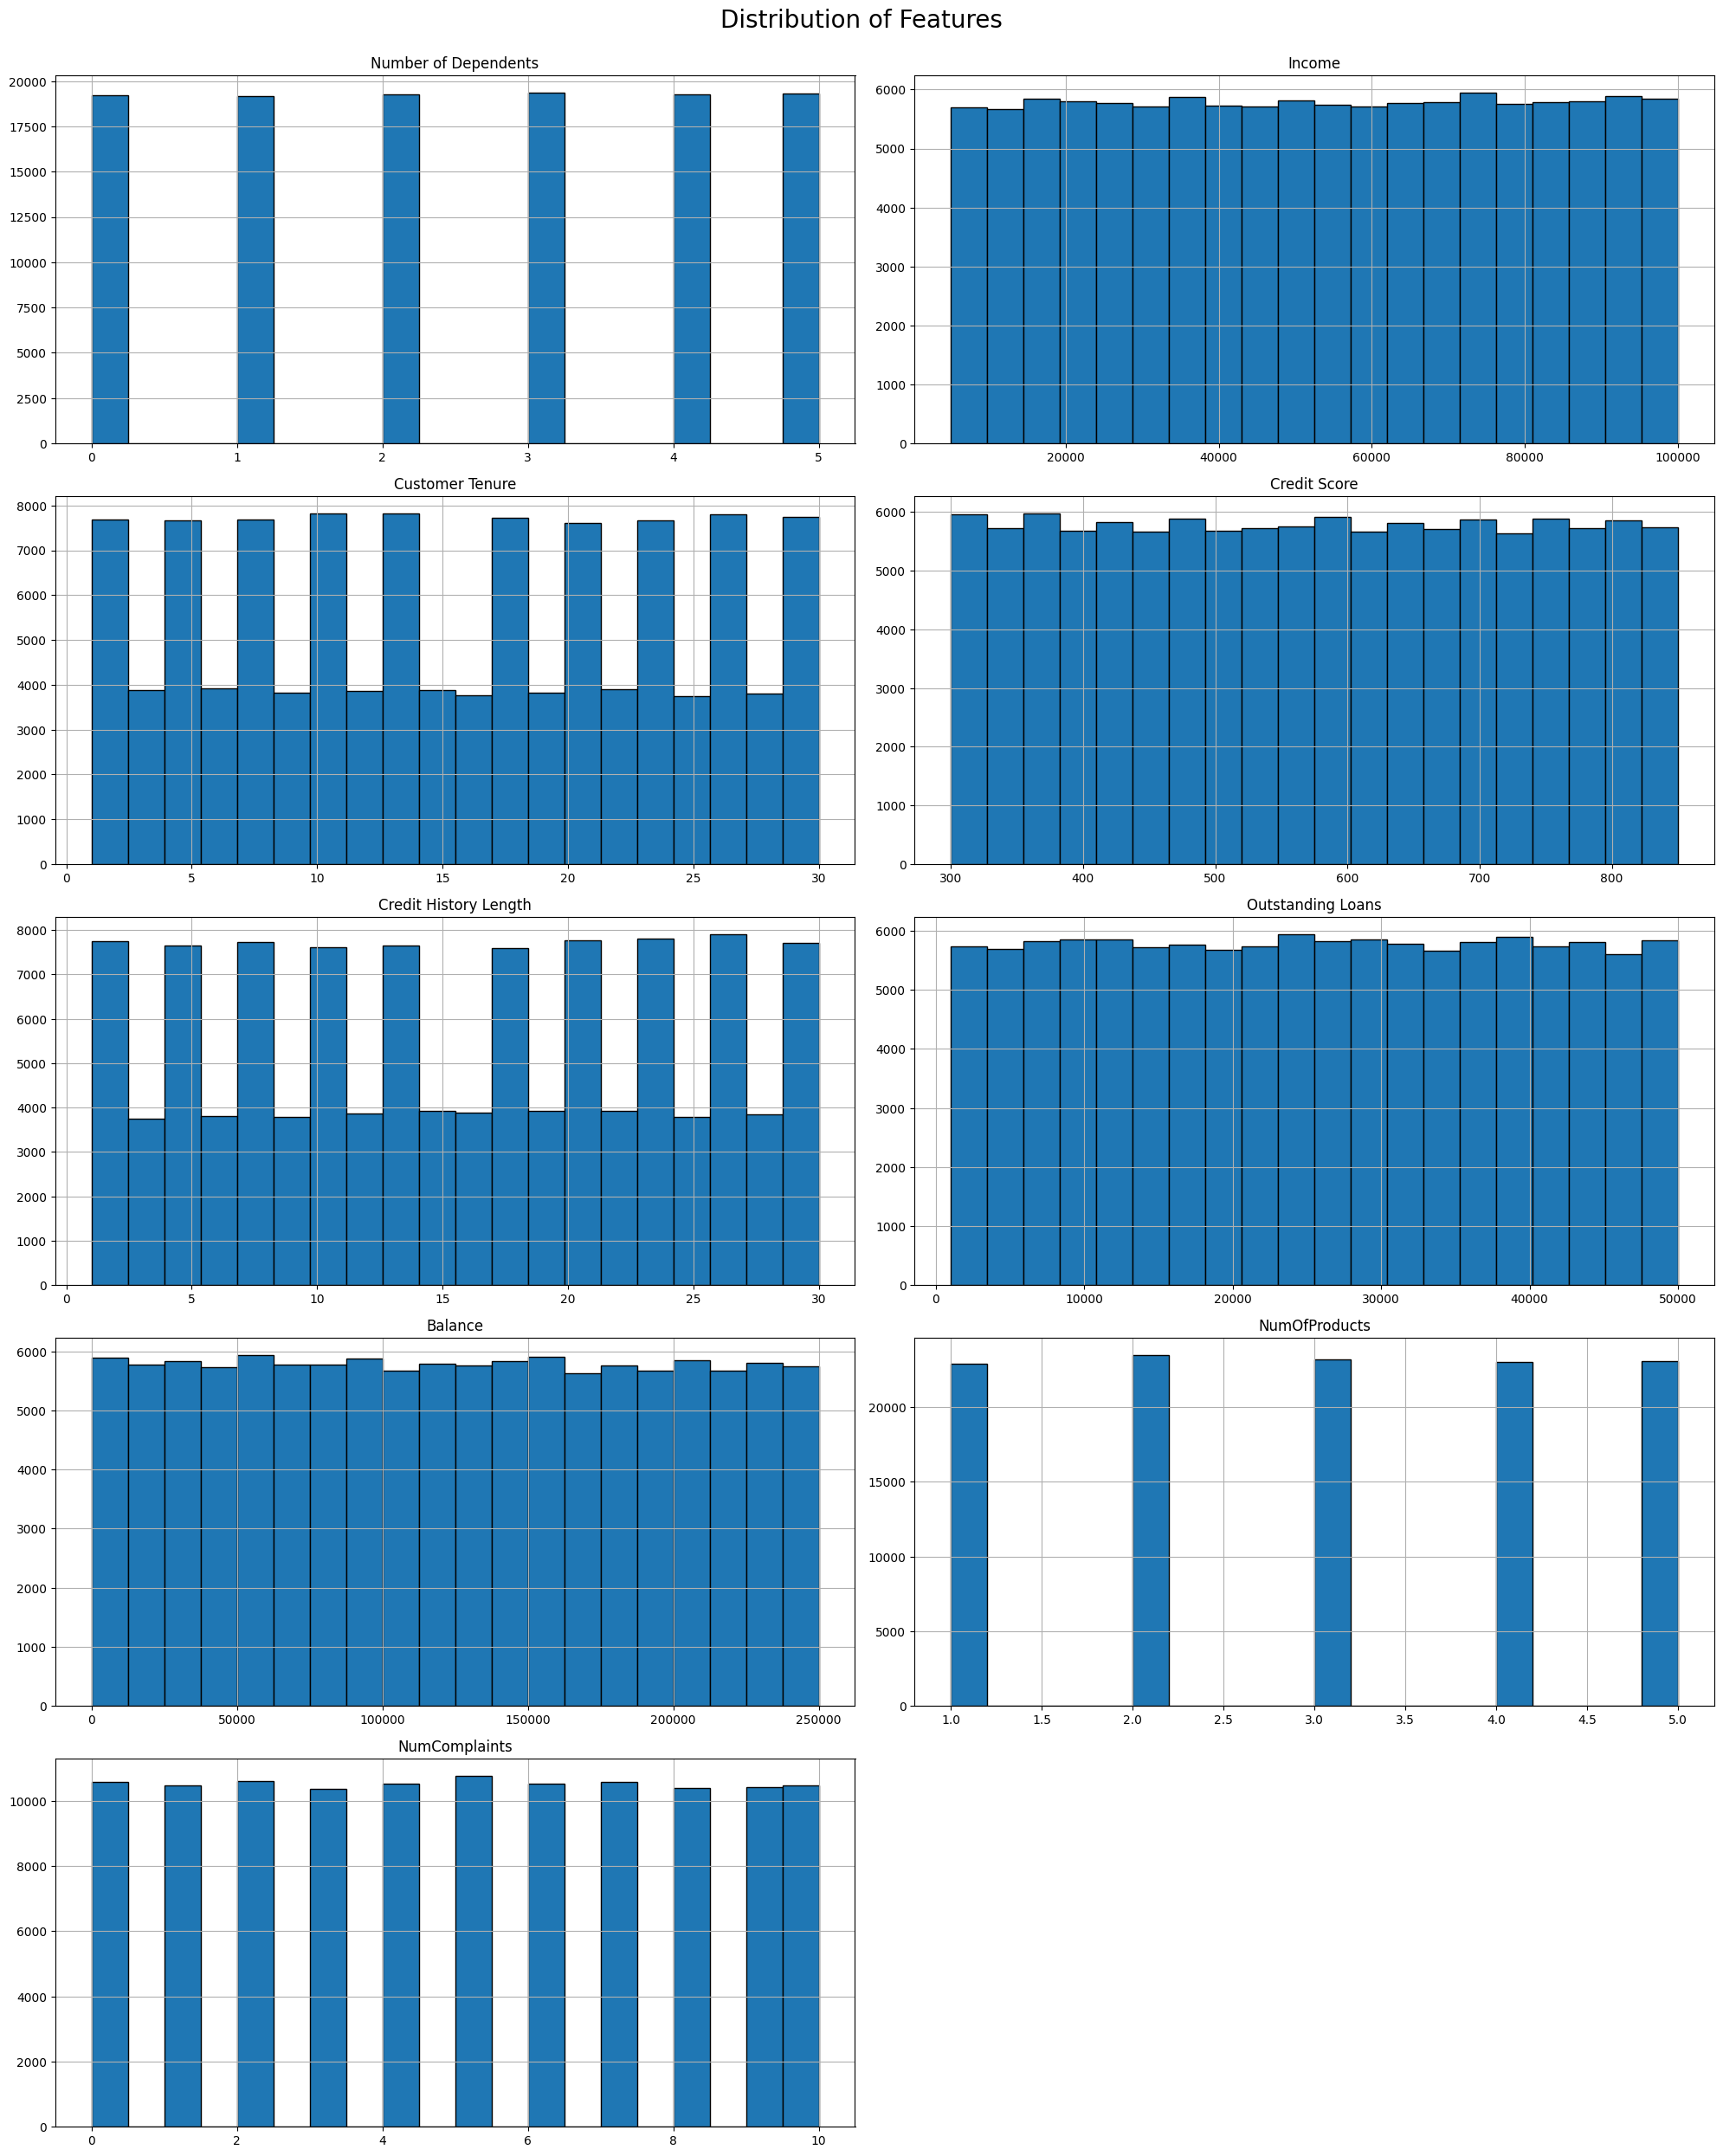

In [26]:
#Plotting the independent variables to know their distribution
num_columns = 2

df[['Number of Dependents', 'Income',
        'Customer Tenure', 
       'Credit Score', 'Credit History Length', 'Outstanding Loans',
        'Balance', 'NumOfProducts', 'NumComplaints'
       ]].hist(bins=20, figsize=(20, 40), layout=(int(len(df.columns)/num_columns)+1, num_columns), edgecolor='black')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Distribution of Features', fontsize=20)
plt.show()

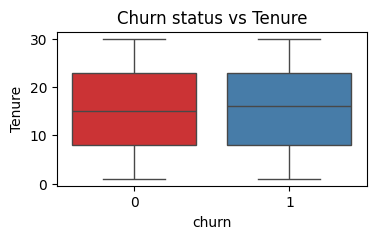

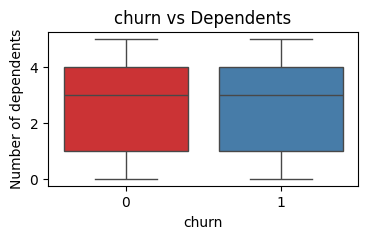

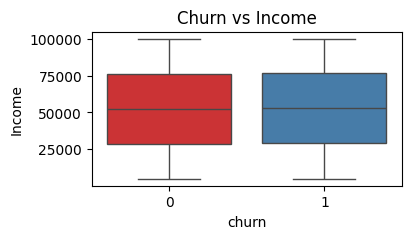

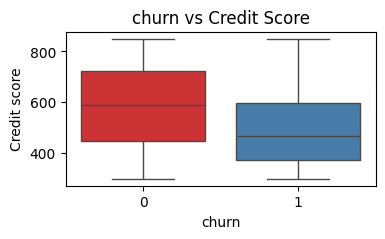

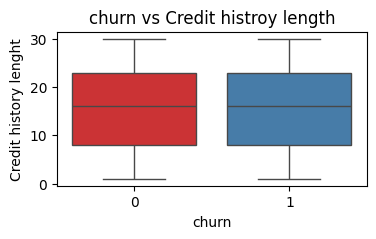

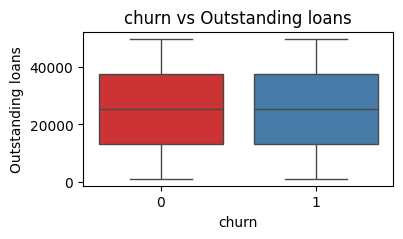

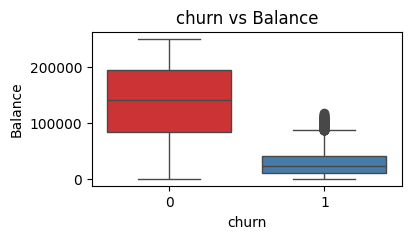

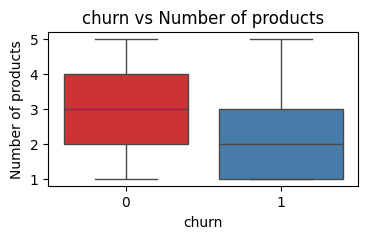

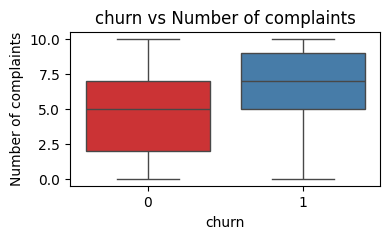

In [28]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Customer Tenure', data=df, palette='Set1')
plt.title('Churn status vs Tenure')
plt.xlabel('churn')
plt.ylabel('Tenure')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Number of Dependents', data=df, palette='Set1')
plt.title('churn vs Dependents')
plt.xlabel('churn')
plt.ylabel('Number of dependents')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Income', data=df, palette='Set1')
plt.title('Churn vs Income')
plt.xlabel('churn')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Credit Score', data=df, palette='Set1')
plt.title('churn vs Credit Score')
plt.xlabel('churn')
plt.ylabel('Credit score')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Credit History Length', data=df, palette='Set1')
plt.title('churn vs Credit histroy length')
plt.xlabel('churn')
plt.ylabel('Credit history lenght')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Outstanding Loans', data=df, palette='Set1')
plt.title('churn vs Outstanding loans')
plt.xlabel('churn')
plt.ylabel('Outstanding loans')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='Balance', data=df, palette='Set1')
plt.title('churn vs Balance')
plt.xlabel('churn')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='NumOfProducts', data=df, palette='Set1')
plt.title('churn vs Number of products')
plt.xlabel('churn')
plt.ylabel('Number of products')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='Churn Flag', y='NumComplaints', data=df, palette='Set1')
plt.title('churn vs Number of complaints')
plt.xlabel('churn')
plt.ylabel('Number of complaints')
plt.show()


In [29]:
df.dtypes

Gender                    object
Marital Status            object
Number of Dependents       int64
Income                   float64
Education Level           object
Customer Tenure            int64
Customer Segment          object
Credit Score               int64
Credit History Length      int64
Outstanding Loans        float64
Churn Flag                 int64
Balance                  float64
NumOfProducts              int64
NumComplaints              int64
dtype: object

In [32]:
# Encoding the categorical variables
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Customer Segment']

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define X (features) and y (dependent variable)
X = df.drop('Churn Flag', axis=1)  
y = df['Churn Flag']  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.head())
print(y_train.head())

       Gender  Marital Status  Number of Dependents    Income  \
12396       1               1                     4  52744.53   
2378        0               1                     1  29213.60   
49114       0               0                     3  10828.12   
75530       1               1                     2  20321.87   
49783       0               1                     2  21442.81   

       Education Level  Customer Tenure  Customer Segment  Credit Score  \
12396                2               15                 0           596   
2378                 0                7                 1           712   
49114                1                9                 1           642   
75530                0               28                 1           542   
49783                2               23                 2           431   

       Credit History Length  Outstanding Loans    Balance  NumOfProducts  \
12396                     28           27486.06   58893.52              2   
2378

In [33]:
#Fitting the models without any upsampling technique

In [34]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort DataFrame based on accuracy
results_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
            XGBoost 99.446558  98.421241 97.028652    99.783262 98.396318  99.980302 97.408262
           AdaBoost 99.066067  97.489996 94.800141    99.660115 97.199758  99.940983 95.607494
  Gradient Boosting 98.914735  98.677249 92.359392    99.827595 96.020914  99.928131 94.865901
      Random Forest 98.806641  98.077648 92.041033    99.748781 95.817435  99.911463 94.348615
Logistic Regression 94.910930  83.319871 72.974885    97.965617 84.551935  98.155541 75.155281
                KNN 89.363542  57.255832 51.220375    94.675139 69.636888  87.762642 48.171966


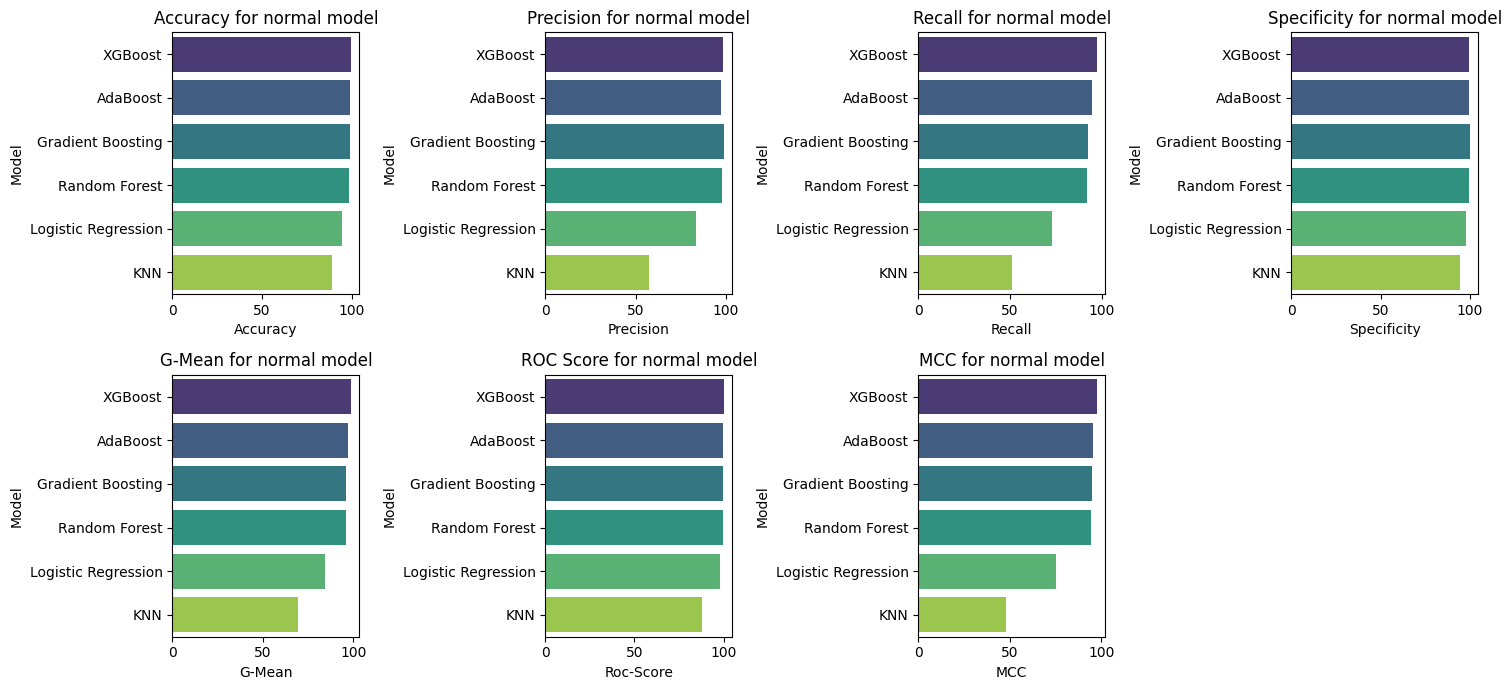

In [35]:
# Plot the results
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Accuracy for normal model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results_df, palette='viridis')
plt.title('Precision for normal model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results_df, palette='viridis')
plt.title('Recall for normal model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results_df, palette='viridis')
plt.title('Specificity for normal model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results_df, palette='viridis')
plt.title('G-Mean for normal model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results_df, palette='viridis')
plt.title('ROC Score for normal model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results_df, palette='viridis')
plt.title('MCC for normal model')

plt.tight_layout()
plt.show()

In [36]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results1 = []
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results1.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results1_df = pd.DataFrame(results1)

# Sort DataFrame based on accuracy
results1_df = results1_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results1_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
            XGBoost 99.234694  95.721187 98.125221    99.389193 98.755185  99.965109 96.481335
           AdaBoost 98.205638  88.554987 97.983728    98.236540 98.110053  99.864276 92.159437
      Random Forest 98.196991  90.627107 95.083127    98.630609 96.840626  99.753132 91.806302
  Gradient Boosting 97.479246  83.234597 99.398656    97.211960 98.299228  99.884679 89.627176
Logistic Regression 91.745936  60.764540 91.651928    91.759027 91.705462  97.614011 70.456200
                KNN 84.888447  43.554612 79.837283    85.591843 82.664504  88.009099 51.399655


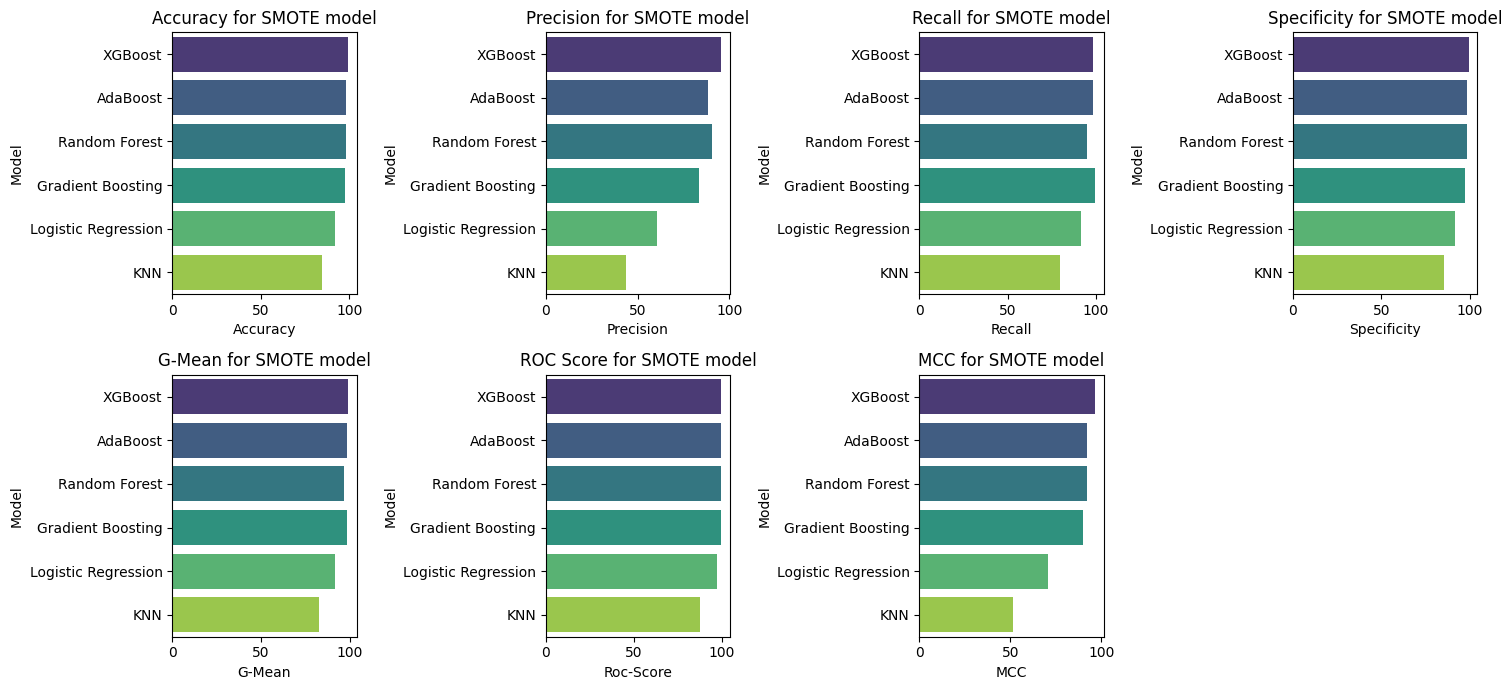

In [37]:
# Plot the results for SMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results1_df, palette='viridis')
plt.title('Accuracy for SMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results1_df, palette='viridis')
plt.title('Precision for SMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results1_df, palette='viridis')
plt.title('Recall for SMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results1_df, palette='viridis')
plt.title('Specificity for SMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results1_df, palette='viridis')
plt.title('G-Mean for SMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results1_df, palette='viridis')
plt.title('ROC Score for SMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results1_df, palette='viridis')
plt.title('MCC for SMOTE model')

plt.tight_layout()
plt.show()


In [38]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply BorderlineSMOTE to balance the dataset
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')  
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results2 = []
for name, clf in classifiers.items():
    clf.fit(X_train_borderline_smote, y_train_borderline_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results2.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results2_df = pd.DataFrame(results2)

# Sort DataFrame based on accuracy
results2_df = results2_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results2_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
            XGBoost 99.256313  95.665635 98.372833    99.379341 98.874806  99.965416 96.588232
           AdaBoost 98.283466  89.422453 97.488504    98.394168 97.940289  99.856439 92.412680
      Random Forest 98.205638  91.471802 94.092678    98.778385 96.407068  99.731365 91.751730
  Gradient Boosting 97.500865  83.617339 98.938804    97.300626 98.116296  99.836708 89.625280
Logistic Regression 91.257350  59.063274 92.783870    91.044776 91.910210  97.552266 69.711414
                KNN 85.312176  44.394178 79.837283    86.074578 82.897289  87.485978 52.133396


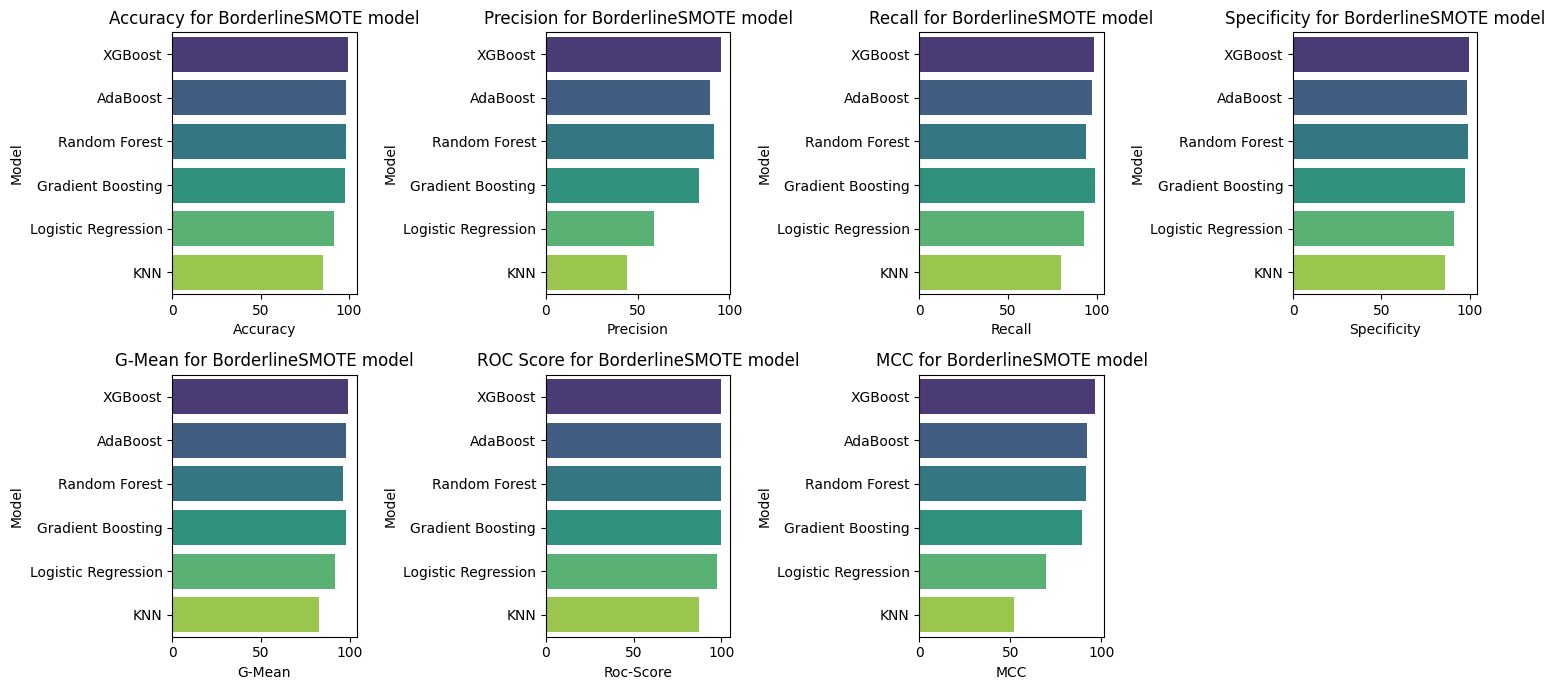

In [39]:
# Plot the results for SMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results2_df, palette='viridis')
plt.title('Accuracy for BorderlineSMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results2_df, palette='viridis')
plt.title('Precision for BorderlineSMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results2_df, palette='viridis')
plt.title('Recall for BorderlineSMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results2_df, palette='viridis')
plt.title('Specificity for BorderlineSMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results2_df, palette='viridis')
plt.title('G-Mean for BorderlineSMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results2_df, palette='viridis')
plt.title('ROC Score for BorderlineSMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results2_df, palette='viridis')
plt.title('MCC for BorderlineSMOTE model')

plt.tight_layout()
plt.show()


In [40]:
from imblearn.over_sampling import SVMSMOTE

# Apply SVMSMOTE to balance the dataset
svm_smote = SVMSMOTE(random_state=42)  
X_train_svm_smote, y_train_svm_smote = svm_smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results3 = []
for name, clf in classifiers.items():
    clf.fit(X_train_svm_smote, y_train_svm_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results3.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results3_df = pd.DataFrame(results3)

# Sort DataFrame based on accuracy
results3_df = results3_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results3_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
            XGBoost 98.936354  92.859515 98.903431    98.940939 98.922183  99.954901 95.240239
      Random Forest 98.214286  89.547837 96.674920    98.428649 97.547844  99.811750 92.042324
           AdaBoost 97.820823  85.379226 99.151044    97.635584 98.390396  99.904049 90.839762
  Gradient Boosting 96.770149  79.478458 99.186417    96.433673 97.800360  99.847377 87.112092
Logistic Regression 91.010896  58.292683 92.996109    90.734447 91.858317  97.454563 69.223062
                KNN 85.969388  45.704891 78.669968    86.985863 82.723486  87.867744 52.763634


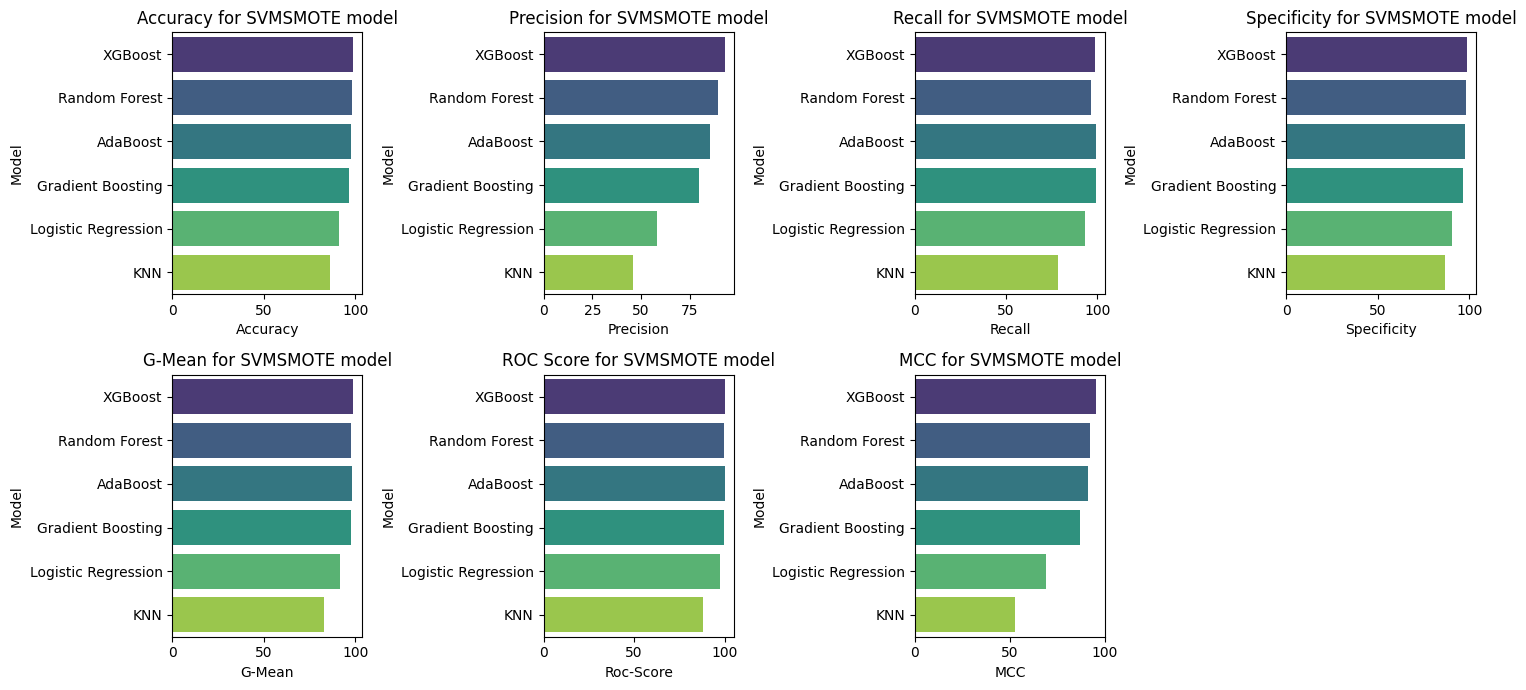

In [41]:
# Plot the results for SVMSMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results3_df, palette='viridis')
plt.title('Accuracy for SVMSMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results3_df, palette='viridis')
plt.title('Precision for SVMSMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results3_df, palette='viridis')
plt.title('Recall for SVMSMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results3_df, palette='viridis')
plt.title('Specificity for SVMSMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results3_df, palette='viridis')
plt.title('G-Mean for SVMSMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results3_df, palette='viridis')
plt.title('ROC Score for SVMSMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results3_df, palette='viridis')
plt.title('MCC for SVMSMOTE model')

plt.tight_layout()
plt.show()


In [42]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to balance the dataset
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results4 = []
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results4.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results4_df = pd.DataFrame(results4)

# Sort DataFrame based on accuracy
results4_df = results4_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results4_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
            XGBoost 99.221723  95.340870 98.443580    99.330082 98.885838  99.967021 96.439298
      Random Forest 98.335351  91.333785 95.436859    98.738978 97.073879  99.766665 92.418700
           AdaBoost 98.261847  89.024783 97.842236    98.320280 98.080966  99.850441 92.366380
  Gradient Boosting 97.353857  82.468484 99.504775    97.054332 98.271916  99.890204 89.197686
Logistic Regression 91.218437  59.273066 89.989388    91.389587 90.686785  97.073367 68.566130
                KNN 83.699412  41.502974 81.464450    84.010640 82.727750  87.690798 50.221916


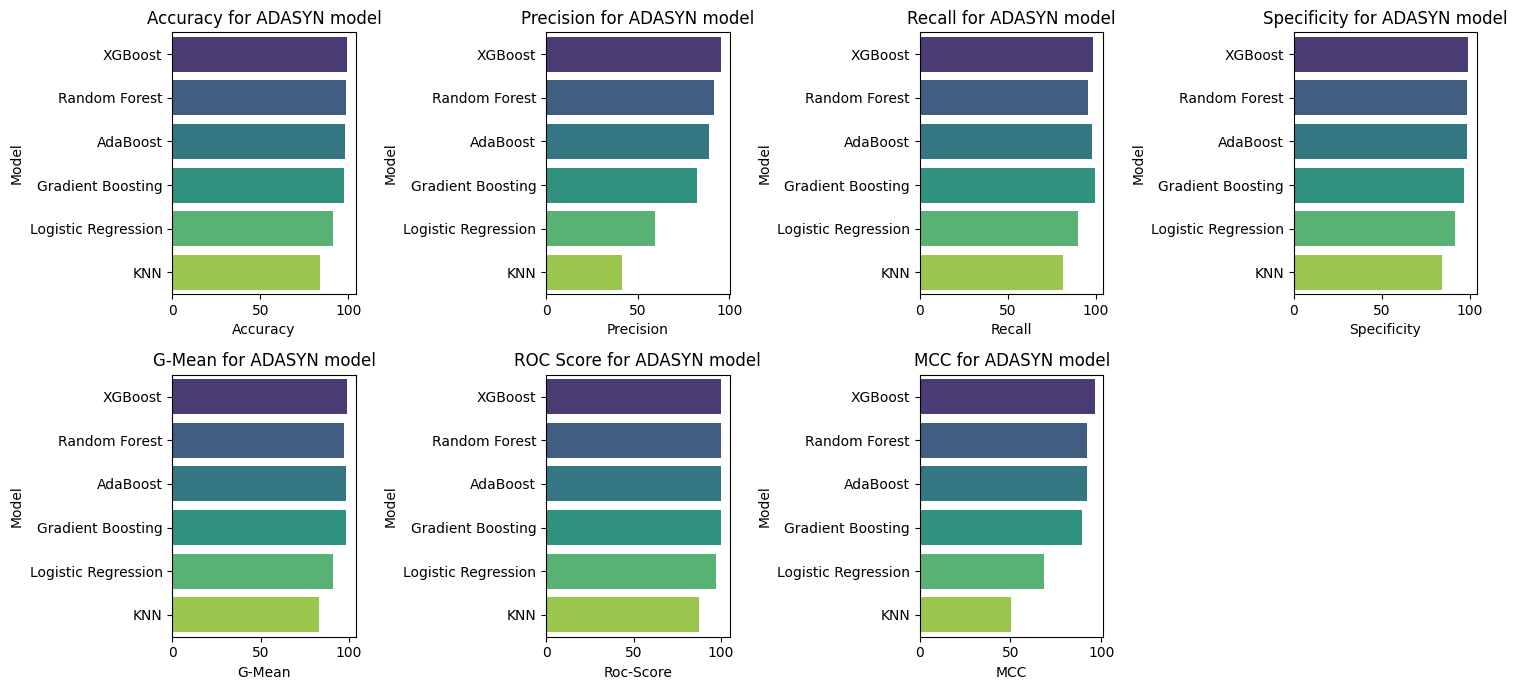

In [43]:
# Plot the results for ADASYN Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results4_df, palette='viridis')
plt.title('Accuracy for ADASYN model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results4_df, palette='viridis')
plt.title('Precision for ADASYN model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results4_df, palette='viridis')
plt.title('Recall for ADASYN model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results4_df, palette='viridis')
plt.title('Specificity for ADASYN model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results4_df, palette='viridis')
plt.title('G-Mean for ADASYN model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results4_df, palette='viridis')
plt.title('ROC Score for ADASYN model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results4_df, palette='viridis')
plt.title('MCC for ADASYN model')

plt.tight_layout()
plt.show()


In [44]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Over-Sampling to balance the dataset
random_oversampler = RandomOverSampler(random_state=42)
X_train_random_oversampled, y_train_random_oversampled = random_oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results5 = []
for name, clf in classifiers.items():
    clf.fit(X_train_random_oversampled, y_train_random_oversampled)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results5.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results5_df = pd.DataFrame(results5)

# Sort DataFrame based on accuracy
results5_df = results5_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results5_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
            XGBoost 99.329817  95.288136 99.434029    99.315305 99.374649  99.978355 96.962929
      Random Forest 98.871498  95.335689 95.436859    99.349786 97.373669  99.901386 94.743392
           AdaBoost 97.570045  83.535683 99.787761    97.261219 98.516391  99.939659 90.022800
  Gradient Boosting 96.242650  76.531165 99.893880    95.734200 97.791926  99.951508 85.539772
Logistic Regression 91.555690  60.125116 91.793421    91.522585 91.657903  97.567650 70.047374
                KNN 85.152196  44.066471 79.731164    85.907098 82.761542  86.751250 51.803947


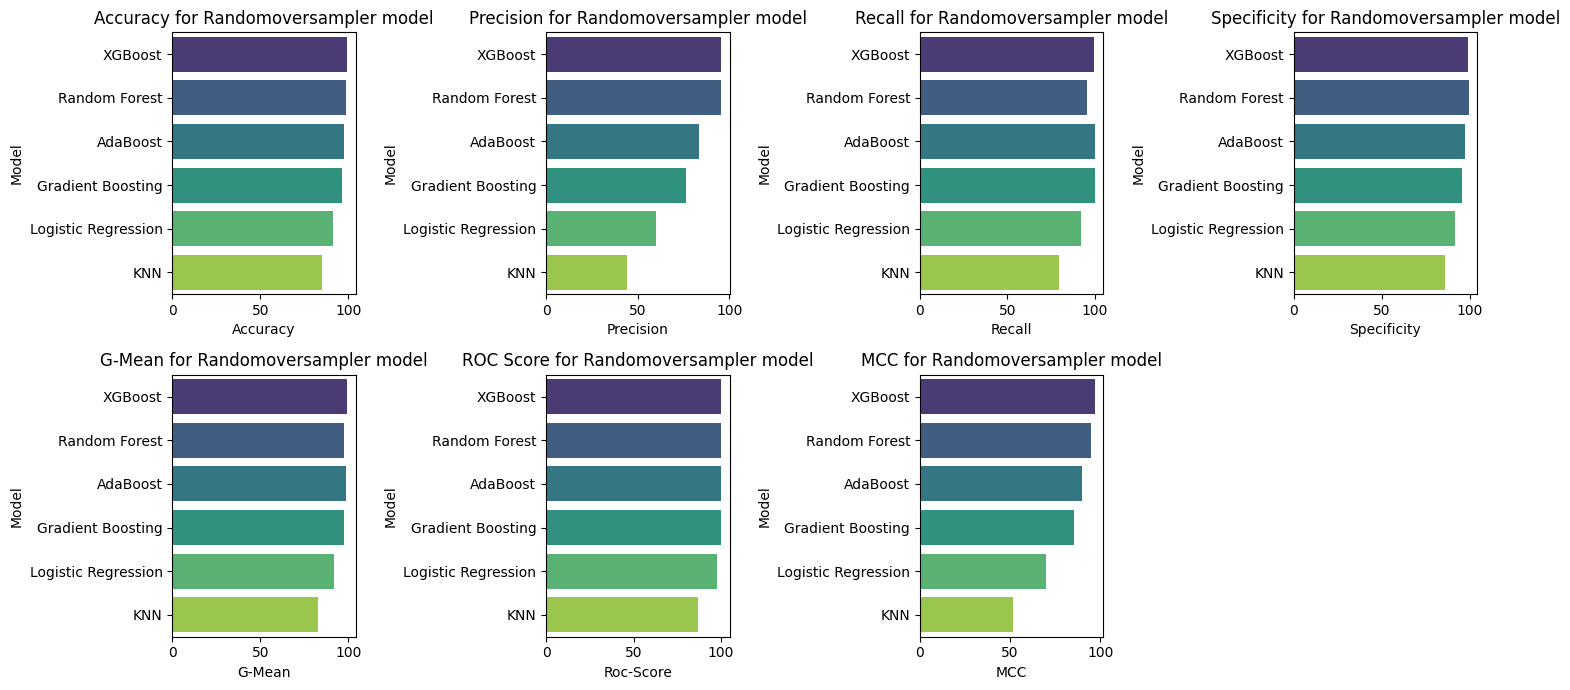

In [45]:
# Plot the results for randomoversampler Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results5_df, palette='viridis')
plt.title('Accuracy for Randomoversampler model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results5_df, palette='viridis')
plt.title('Precision for Randomoversampler model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results5_df, palette='viridis')
plt.title('Recall for Randomoversampler model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results5_df, palette='viridis')
plt.title('Specificity for Randomoversampler model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results5_df, palette='viridis')
plt.title('G-Mean for Randomoversampler model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results5_df, palette='viridis')
plt.title('ROC Score for Randomoversampler model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results5_df, palette='viridis')
plt.title('MCC for Randomoversampler model')

plt.tight_layout()
plt.show()


Confusion Matrices for KNN:


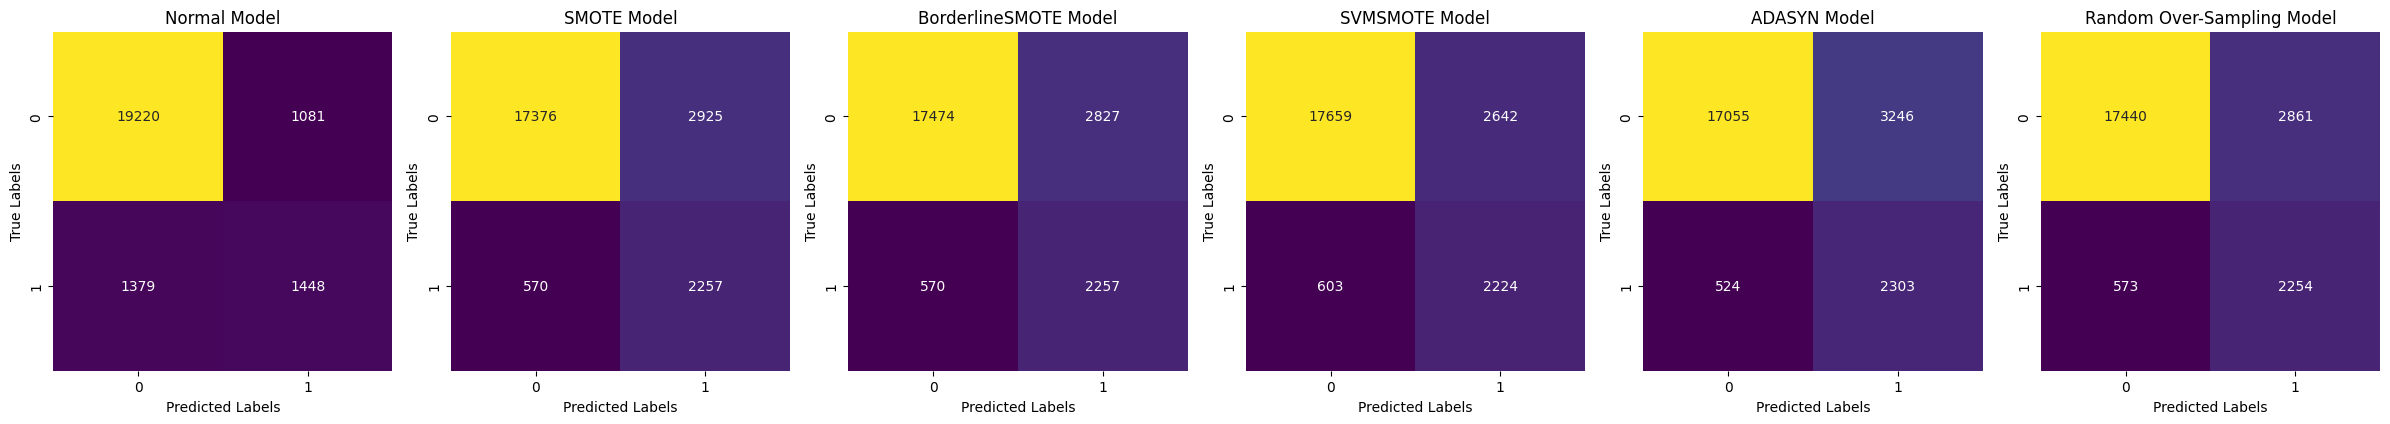

Confusion Matrices for Logistic Regression:


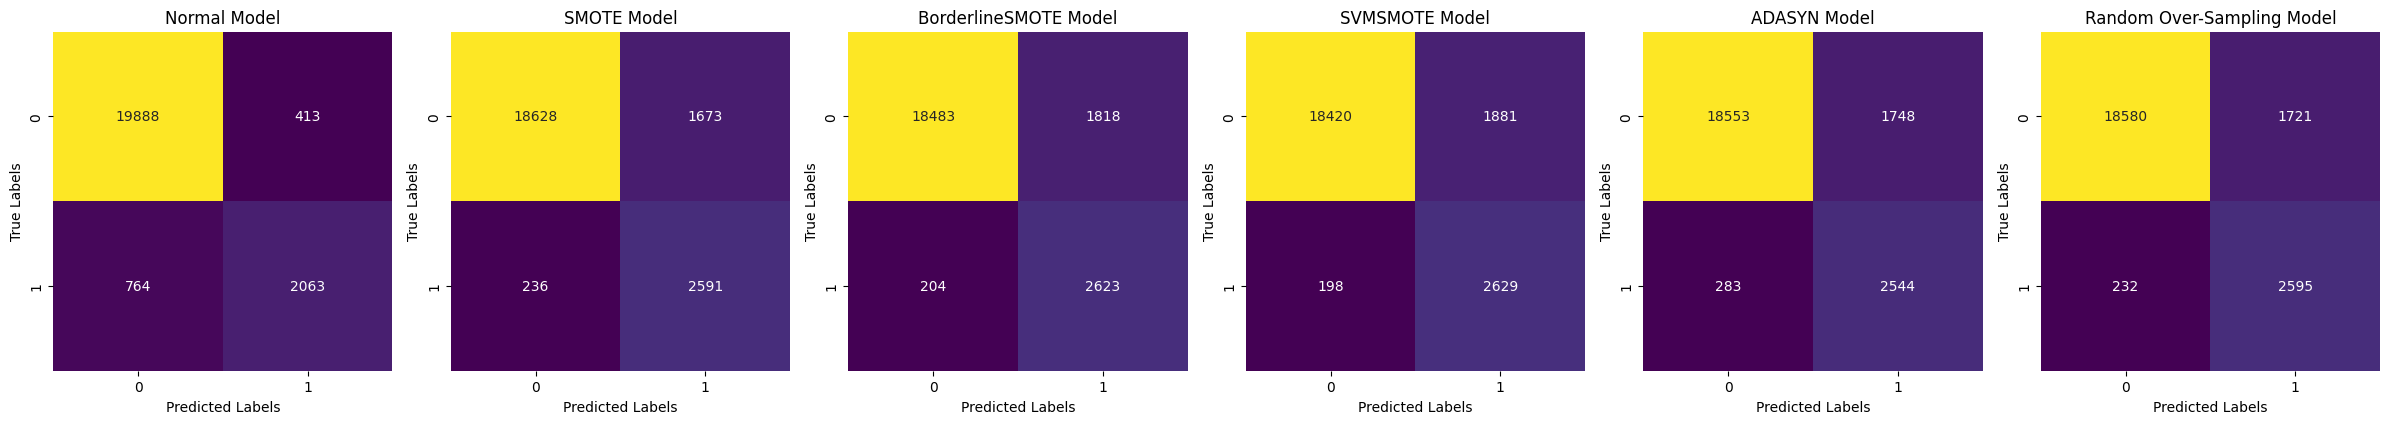

Confusion Matrices for Random Forest:


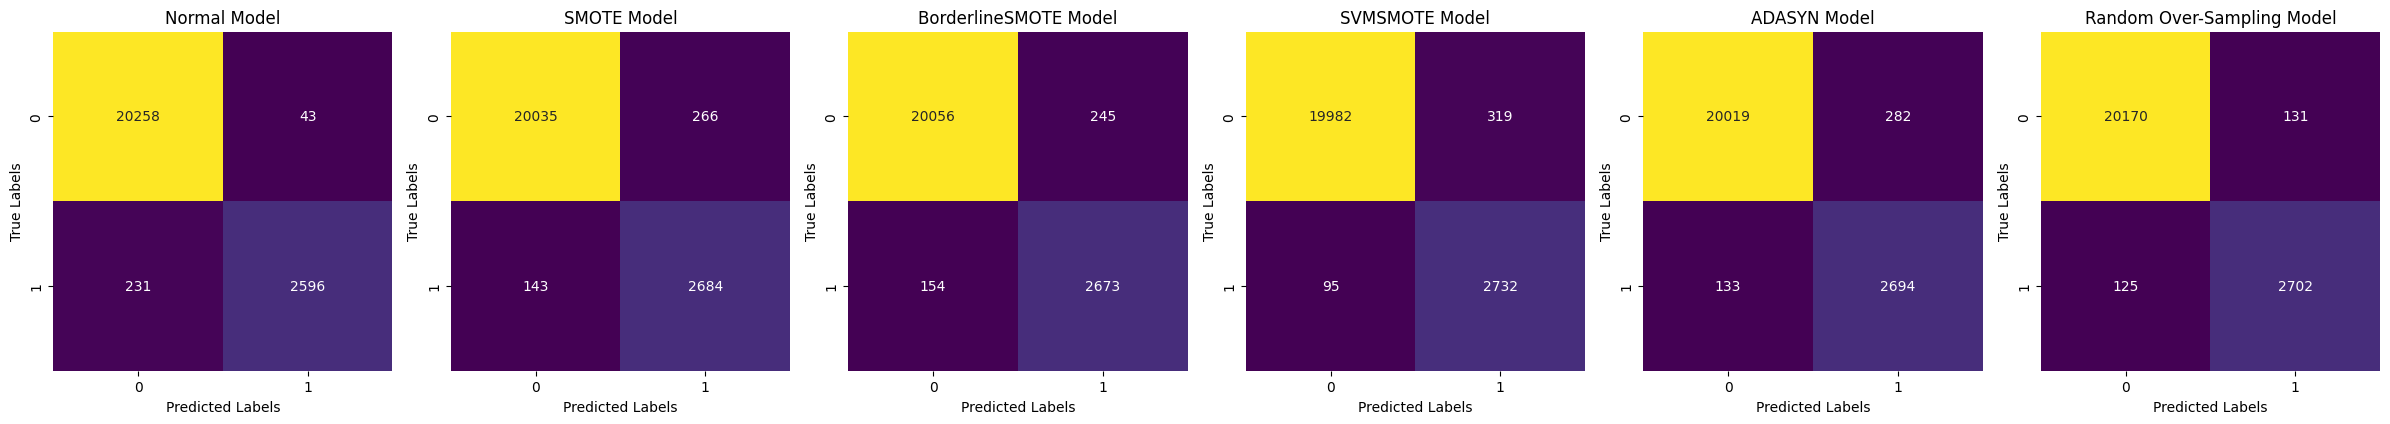

Confusion Matrices for XGBoost:


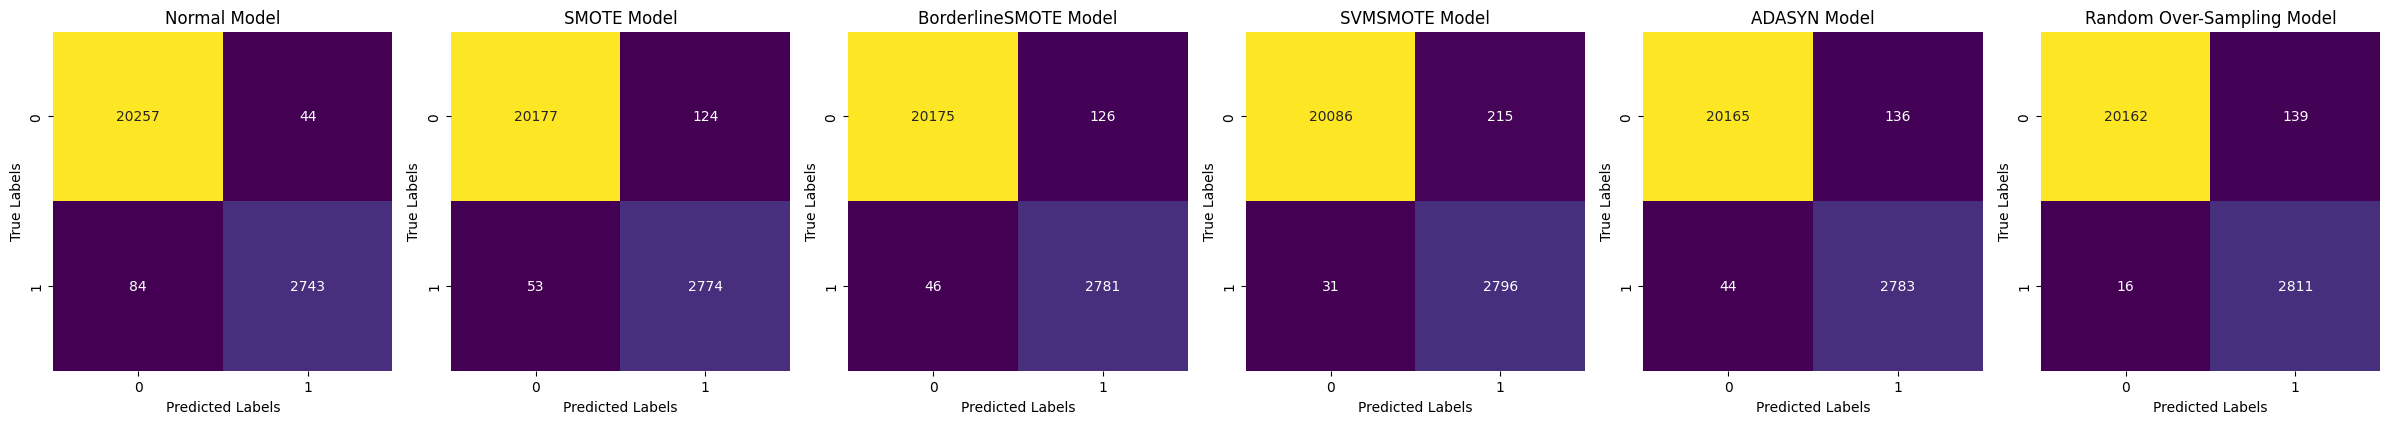

Confusion Matrices for Gradient Boosting:


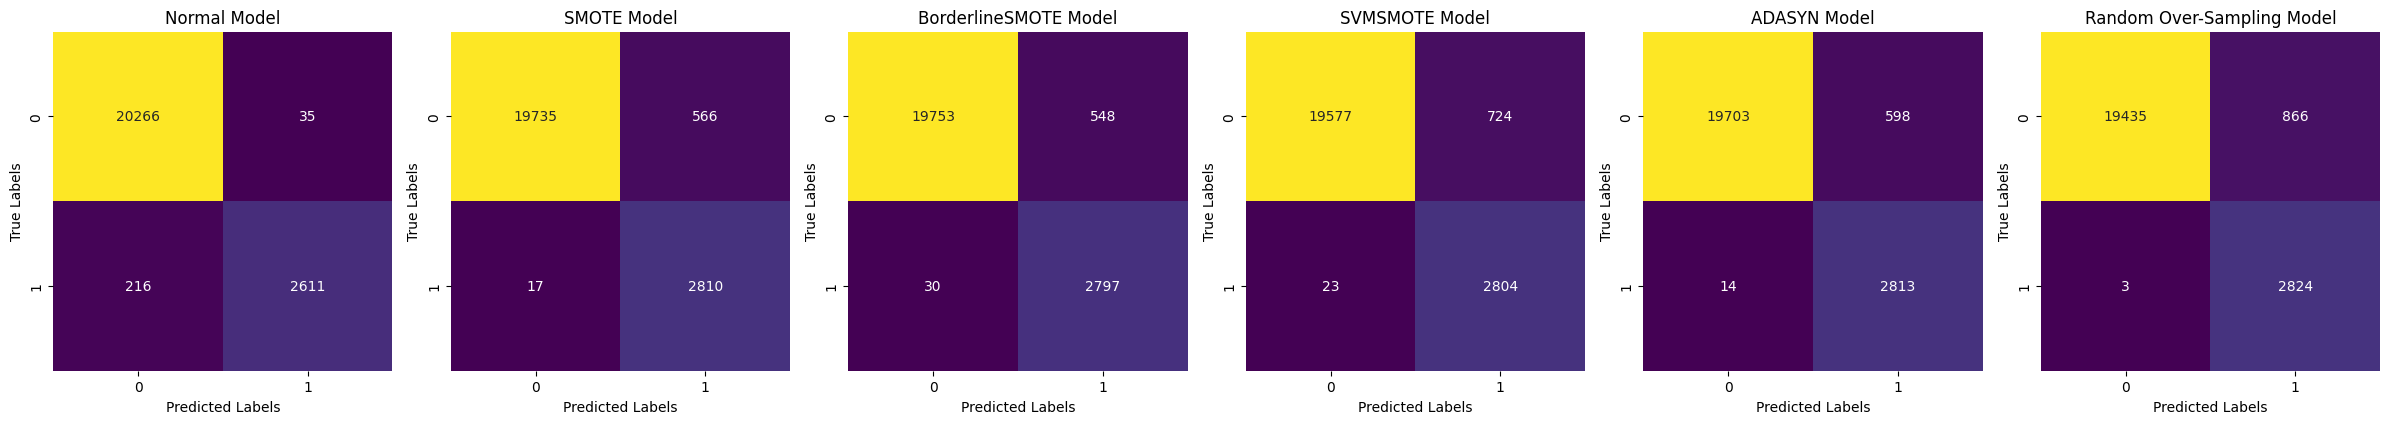

Confusion Matrices for AdaBoost:


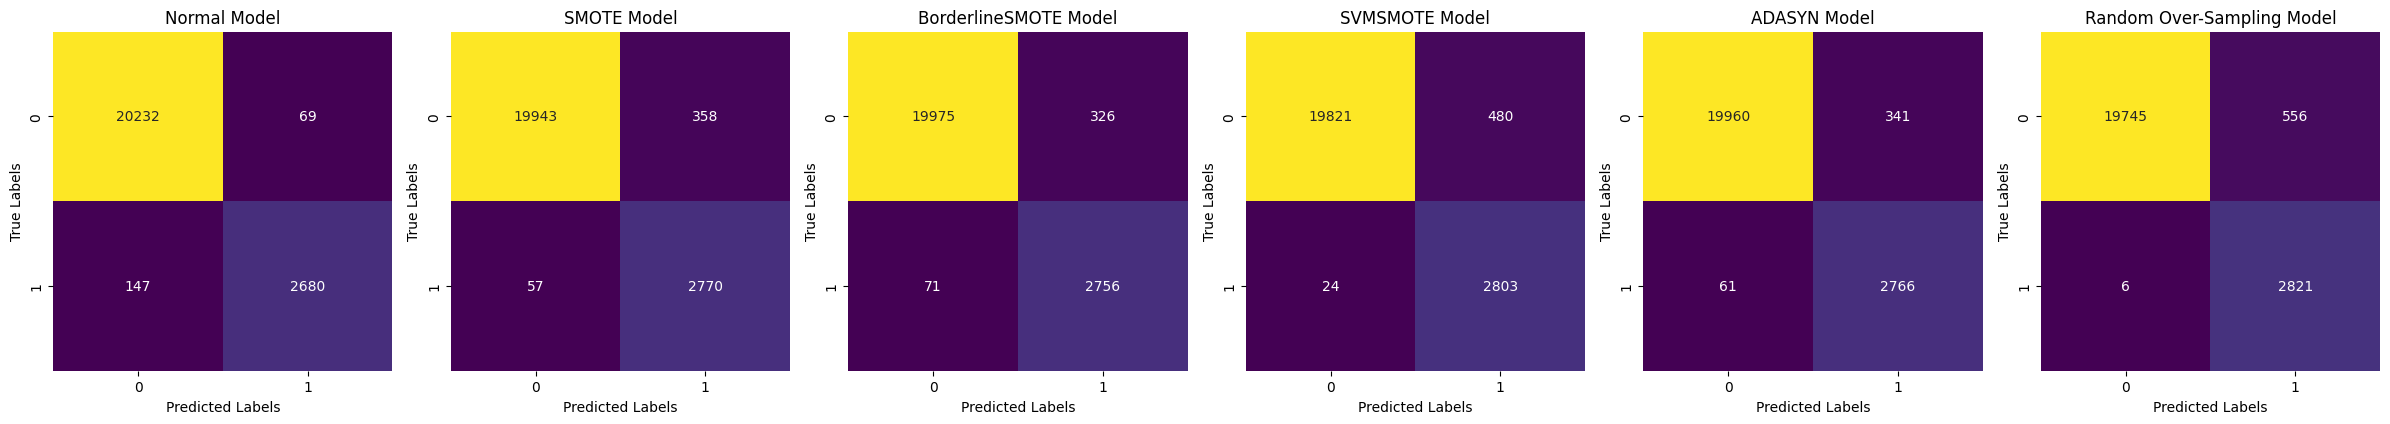

In [46]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Define resampling techniques
resampling_techniques = {
    'Normal': None,
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Over-Sampling': RandomOverSampler(random_state=42)
}

# Fit classifiers and calculate confusion matrices
for name, clf in classifiers.items():
    print(f"Confusion Matrices for {name}:")

    # Initialize subplots with square aspect ratio
    fig, axes = plt.subplots(1, 6, figsize=(24, 24))  # Increase height for square plots
    axes = axes.flatten()

    for idx, (technique_name, technique) in enumerate(resampling_techniques.items()):
        if technique is not None:
            # Apply resampling
            X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
            clf.fit(X_train_resampled, y_train_resampled)
        else:
            # Fit on original data
            clf.fit(X_train, y_train)
            X_test_encoded = X_test  # No resampling applied to the test set

        # Predict and calculate confusion matrix
        y_pred = clf.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix without color bar
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", ax=axes[idx], square=True, cbar=False)
        axes[idx].set_title(f"{technique_name} Model")
        axes[idx].set_xlabel("Predicted Labels")
        axes[idx].set_ylabel("True Labels")

    plt.tight_layout()
    plt.show()